In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [2]:
source_data = pd.read_csv('view_food_clean.csv')
source_data_copy = source_data.copy()
source_data_copy = source_data_copy[source_data_copy['merged_to'].isna()]

/var/folders/1p/gl48js3964n3jh2chpp0xk9c0000gn/T/ipykernel_47566/460511831.py:1: DtypeWarning: Columns (36,52) have mixed types. Specify dtype option on import or set low_memory=False.
  source_data = pd.read_csv('view_food_clean.csv')


In [4]:
source_data = pd.read_csv('view_food_clean.csv')
source_data.columns

/var/folders/1p/gl48js3964n3jh2chpp0xk9c0000gn/T/ipykernel_23218/628436561.py:1: DtypeWarning: Columns (36,52) have mixed types. Specify dtype option on import or set low_memory=False.
  source_data = pd.read_csv('view_food_clean.csv')


Index(['id', 'name', 'name_search', 'active', 'energy', 'protein', 'fat',
       'saturated_fatty_acid', 'carbohydrates', 'sugar', 'starch',
       'dietary_fiber', 'salt', 'sodium', 'k', 'ca', 'p', 'fe', 'polyols',
       'remarks', 'cholesterol', 'omega6', 'omega3', 'mov', 'eov', 'vit_d',
       'vit_c', 'vit_b12', 'vit_b6', 'vit_b2', 'vit_b1', 'vit_a', 'mg',
       'water', 'is_food', 'remarks_carbohydrates', 'hash', 'user_study_id',
       'unit', 'synonyms', 'brands', 'brands_search', 'glucose', 'fructose',
       'excess_fructose', 'lactose', 'sorbitol', 'mannitol', 'fructans', 'gos',
       'token', 'token_deleted', 'bron', 'user_id', 'deleted', 'categories',
       'barcode', 'merged_to', 'created', 'updated', 'app_ver'],
      dtype='object')

In [3]:
source_data_copy

,id,name,name_search,active,energy,protein,fat,saturated_fatty_acid,carbohydrates,sugar,...,token_deleted,bron,user_id,deleted,categories,barcode,merged_to,created,updated,app_ver
0,24615,Dolce Gusto Lungo,dolce gusto lungo,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,7613031794331;5400113609087;8445290872203,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
1,24616,Dolce Gusto espresso intenso,dolce gusto espresso intenso,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,7613036828444,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
2,24617,Dolce Gusto grande intenso,dolce gusto grande intenso,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
3,24618,Dolce Gusto cappuccino,dolce gusto cappuccino,1,36.0,1.6,1.6,1.0,3.5,3.5,...,NaN,NescafÃ©,NaN,NaN,dranken,7613036306294;7613036303477,NaN,2023-01-01 00:00:00,2025-03-12 11:52:28,NaN
4,24619,Dolce Gusto cappuccino ice,dolce gusto cappuccino ice,1,48.0,1.8,1.2,0.8,7.3,6.8,...,NaN,NescafÃ©,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17910,45480,Maiswafels Met Pizzasmaak En Kruiden,maiswafels met pizzasmaak en kruiden,1,415.0,7.4,8.7,0.8,75.0,2.8,...,NaN,NaN,NaN,NaN,NaN,8718907850094,NaN,2025-09-27 22:56:05,2025-09-27 23:00:15,1.3.1
17911,45481,ProteÃ¯ne meerzadenbrood,proteine meerzadenbrood,1,270.0,21.3,13.1,1.5,10.3,1.4,...,NaN,NaN,NaN,NaN,aardappelen en graanproducten,5410724425211;05410724425112,NaN,2025-09-27 23:11:03,2025-09-27 23:15:13,1.3.1
17912,45482,Veggie sea salade,veggie sea salade,0,318.0,5.0,32.0,2.5,2.3,1.2,...,NaN,NaN,NaN,NaN,NaN,5413345008504,NaN,2025-09-28 09:48:11,2025-09-28 09:48:11,1.3.1
17913,45483,Naam niet gevonden,naam niet gevonden,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5715008111133,NaN,2025-09-28 19:43:28,2025-09-28 19:43:28,1.3.1


I don't want to have much noise, so I will only look at the columns whose missing values are < 25%. 

In [4]:
# compute percentage of missing values per column
null_pct = source_data_copy.isna().mean() * 100

# select columns with < 25% missing
cols_lt_25 = null_pct[null_pct < 25].sort_values()

# display percentages and return list of column names
print("Columns with <25% null values (percentage):")
print(cols_lt_25)
cols_lt_25.index.tolist()

Columns with <25% null values (percentage):
id                        0.000000
token                     0.000000
remarks_carbohydrates     0.000000
is_food                   0.000000
created                   0.000000
updated                   0.000000
active                    0.000000
unit                      0.011978
name                      0.017967
energy                    0.862430
carbohydrates             1.054082
name_search               1.551177
fat                       2.359705
protein                   2.431575
saturated_fatty_acid      3.012517
sugar                     3.186201
categories                4.054621
salt                      5.971133
sodium                    7.875666
brands                   11.576930
brands_search            11.576930
barcode                  15.074564
remarks                  16.362221
dtype: float64


['id',
 'token',
 'remarks_carbohydrates',
 'is_food',
 'created',
 'updated',
 'active',
 'unit',
 'name',
 'energy',
 'carbohydrates',
 'name_search',
 'fat',
 'protein',
 'saturated_fatty_acid',
 'sugar',
 'categories',
 'salt',
 'sodium',
 'brands',
 'brands_search',
 'barcode',
 'remarks']

Columns to be used:

In [5]:
TEXT_COLS = [
    # 'name', 'unit', 'name_search', 'categories', 'brands', 'brands_search', 'remarks', 'synonyms'
    'name', 'name_search', 'remarks', 'synonyms', 'brands', 'brands_search', 'bron', 'categories'
]

NUMERIC_COLS = [
    'energy', 'carbohydrates', 'remarks_carbohydrates', 'protein', 'fat', 'saturated_fatty_acid', 'sugar', 'salt', 'sodium'
]

Handle text columns

In [6]:
# Handle missing values by filling with a blank string
source_data_copy[TEXT_COLS] = source_data_copy[TEXT_COLS].fillna('')

# Concatenate the text columns into a single column
source_data_copy['concatenated_text'] = source_data_copy[TEXT_COLS].agg(' '.join, axis=1)

# Initialize and fit the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_vectors = tfidf_vectorizer.fit_transform(source_data_copy['concatenated_text'])

In [7]:
source_data_copy[NUMERIC_COLS] = source_data_copy[NUMERIC_COLS].fillna(0)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
# Scale the numeric features
scaled_numeric_vectors = scaler.fit_transform(source_data_copy[NUMERIC_COLS])

In [10]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

for col in TEXT_COLS:
    source_data_copy[col] = source_data_copy[col].fillna("")

embeddings_list = []

for col in TEXT_COLS:
    print(f"Encoding column: {col}")
    emb = model.encode(source_data_copy[col].tolist(), normalize_embeddings=True)
    embeddings_list.append(emb)
    
combined_embeddings = np.hstack(embeddings_list)

Encoding column: name
Encoding column: name_search
Encoding column: remarks
Encoding column: synonyms
Encoding column: brands
Encoding column: brands_search
Encoding column: bron
Encoding column: categories


In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
combined_vectors = hstack([tfidf_vectors, csr_matrix(scaled_numeric_vectors)])

In [11]:
dbscan = DBSCAN(eps=0.3, min_samples=3, metric='cosine') # Using cosine distance for better text vector comparison

# Fit DBSCAN on the TF-IDF matrix (one row per product) and save labels to product_text
labels = dbscan.fit_predict(combined_embeddings)
source_data_copy['cluster_id'] = labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
nonly_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % nonly_noise)

Estimated number of clusters: 150
Estimated number of noise points: 2226


In [12]:
def plot_dbscan_svd(tfidf_matrix,
                    labels=labels,
                    dbscan_model=dbscan,
                    n_components=2,
                    figsize=(10, 6),
                    marker_core_size=50,
                    marker_border_size=8,
                    show_legend=False,
                    title=None):
    """
    Reduce TF-IDF matrix to 2D with TruncatedSVD and plot DBSCAN clusters.
    Returns: coords_2d, svd, fig, ax
    Defaults use variables already defined in the notebook.
    """
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    coords_2d = svd.fit_transform(tfidf_matrix)

    unique_labels = sorted(set(labels))
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_idx = getattr(dbscan_model, "core_sample_indices_", None)
    if core_idx is not None:
        core_samples_mask[core_idx] = True

    fig, ax = plt.subplots(figsize=figsize)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = (0, 0, 0, 1)  # black for noise

        class_member_mask = labels == k
        mask_core = class_member_mask & core_samples_mask
        mask_border = class_member_mask & ~core_samples_mask

        xy_core = coords_2d[mask_core]
        if xy_core.size:
            ax.scatter(xy_core[:, 0], xy_core[:, 1],
                       facecolor=tuple(col), edgecolor="k",
                       s=marker_core_size, marker="o",
                       label=f"cluster {k}" if k != -1 else "noise")

        xy_border = coords_2d[mask_border]
        if xy_border.size:
            ax.scatter(xy_border[:, 0], xy_border[:, 1],
                       facecolor=tuple(col), edgecolor="k",
                       s=marker_border_size, marker="o")

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if title is None:
        title = f"Estimated number of clusters: {n_clusters}"
    ax.set_title(title)

    if show_legend:
        ax.legend(loc="best", markerscale=1, fontsize="small", ncol=2)

    plt.show()
    return coords_2d, svd, fig, ax

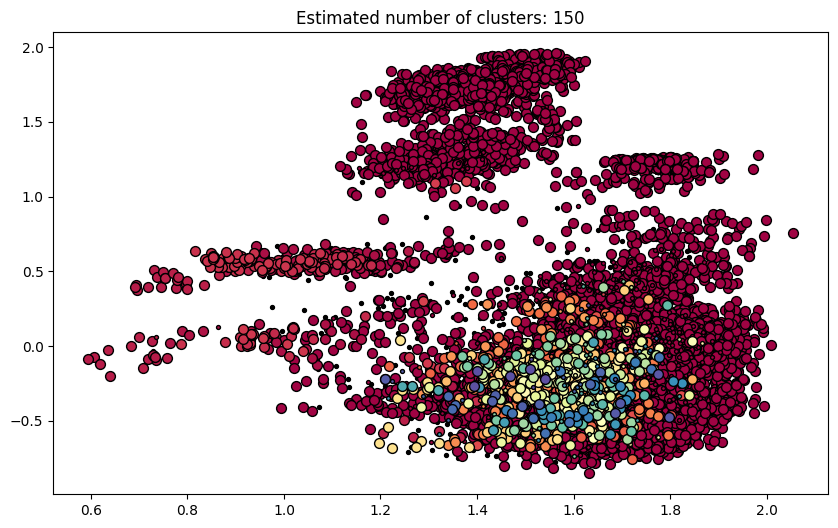

(array([[ 1.188894  ,  0.06657539],
        [ 1.1424729 , -0.00189153],
        [ 1.1972483 ,  0.0290783 ],
        ...,
        [ 1.7716495 ,  0.50165516],
        [ 1.8472434 ,  1.2396619 ],
        [ 1.6785039 ,  0.320083  ]], dtype=float32),
 TruncatedSVD(random_state=42),
 <Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Estimated number of clusters: 150'}>)

In [13]:
plot_dbscan_svd(combined_embeddings,
                labels,
                dbscan,
                2,
                (10, 6),
                50,
                8,
                False,
                None
)

In [14]:
source_data_copy

,id,name,name_search,active,energy,protein,fat,saturated_fatty_acid,carbohydrates,sugar,...,user_id,deleted,categories,barcode,merged_to,created,updated,app_ver,concatenated_text,cluster_id
0,24615,Dolce Gusto Lungo,dolce gusto lungo,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,dranken,7613031794331;5400113609087;8445290872203,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN,Dolce Gusto Lungo dolce gusto lungo Dolce Gust...,0
1,24616,Dolce Gusto espresso intenso,dolce gusto espresso intenso,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,dranken,7613036828444,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN,Dolce Gusto espresso intenso dolce gusto espre...,0
2,24617,Dolce Gusto grande intenso,dolce gusto grande intenso,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN,Dolce Gusto grande intenso dolce gusto grande ...,0
3,24618,Dolce Gusto cappuccino,dolce gusto cappuccino,1,36.0,1.6,1.6,1.0,3.5,3.5,...,NaN,NaN,dranken,7613036306294;7613036303477,NaN,2023-01-01 00:00:00,2025-03-12 11:52:28,NaN,Dolce Gusto cappuccino dolce gusto cappuccino ...,0
4,24619,Dolce Gusto cappuccino ice,dolce gusto cappuccino ice,1,48.0,1.8,1.2,0.8,7.3,6.8,...,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN,Dolce Gusto cappuccino ice dolce gusto cappucc...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17910,45480,Maiswafels Met Pizzasmaak En Kruiden,maiswafels met pizzasmaak en kruiden,1,415.0,7.4,8.7,0.8,75.0,2.8,...,NaN,NaN,,8718907850094,NaN,2025-09-27 22:56:05,2025-09-27 23:00:15,1.3.1,Maiswafels Met Pizzasmaak En Kruiden maiswafel...,0
17911,45481,ProteÃ¯ne meerzadenbrood,proteine meerzadenbrood,1,270.0,21.3,13.1,1.5,10.3,1.4,...,NaN,NaN,aardappelen en graanproducten,5410724425211;05410724425112,NaN,2025-09-27 23:11:03,2025-09-27 23:15:13,1.3.1,ProteÃ¯ne meerzadenbrood proteine meerzadenbro...,-1
17912,45482,Veggie sea salade,veggie sea salade,0,318.0,5.0,32.0,2.5,2.3,1.2,...,NaN,NaN,,5413345008504,NaN,2025-09-28 09:48:11,2025-09-28 09:48:11,1.3.1,Veggie sea salade veggie sea salade Bon Much...,0
17913,45483,Naam niet gevonden,naam niet gevonden,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,,5715008111133,NaN,2025-09-28 19:43:28,2025-09-28 19:43:28,1.3.1,Naam niet gevonden naam niet gevonden,0
